# Summary
🔹 Why do we use fit_transform for the training dataset and only transform for the test dataset?

🔹 Why should we scale features after splitting into X and Y?

🔹 What is data leakage, and how does it impact model performance?

🔹 Why should we avoid scaling the target variable?

🔹 When should we scale the target variable?

🔹 Why do we determine coefficients and intercepts after training a linear regression model?

🔹 What are the key assumptions for Linear Regression?

🔹 How do we check if the model is generalized?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

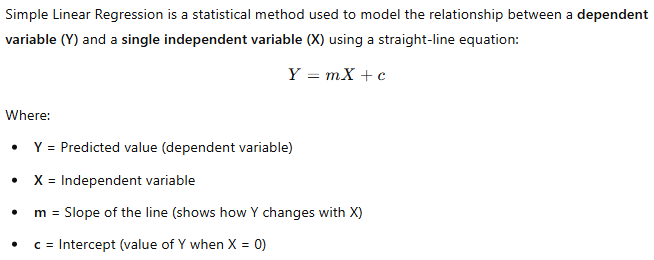

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diabetes = load_diabetes()

In [5]:
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
df["target"] = diabetes.target

In [8]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# Step 3: Select Feature & Target Variable

In [10]:
X = df["bmi"]

In [11]:
y = df.target

In [12]:
X.shape,y.shape

((442,), (442,))

# Step 4: Split Data into Training & Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Step 5: Standardize the Feature (Optional but Recommended)

In [17]:
from sklearn.preprocessing import StandardScaler

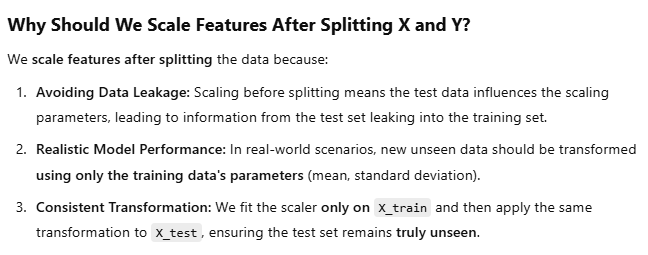

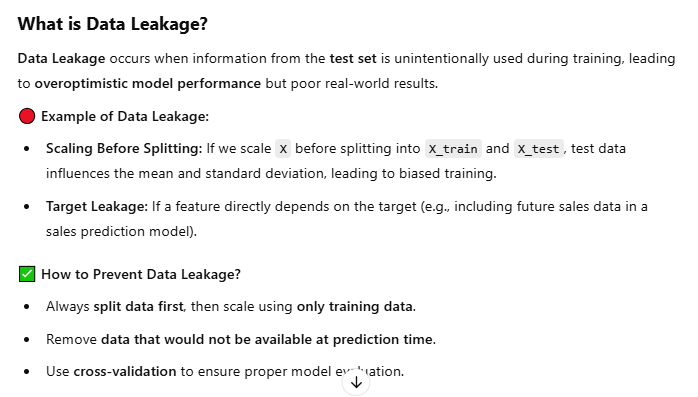

In [20]:
scaler = StandardScaler()

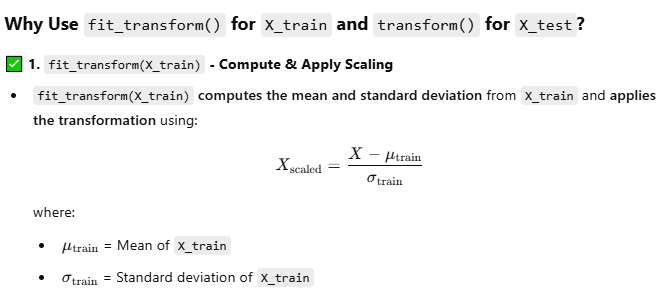

In [22]:
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))

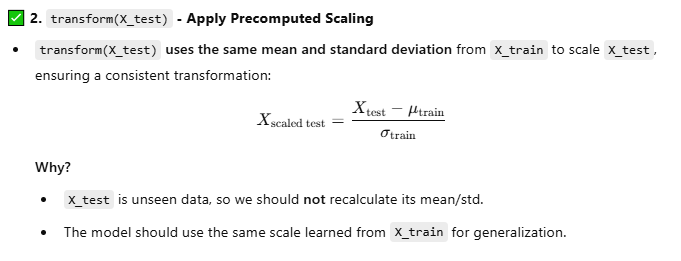

In [24]:
X_test_scaled = scaler.transform(X_test.values.reshape(-1,1))

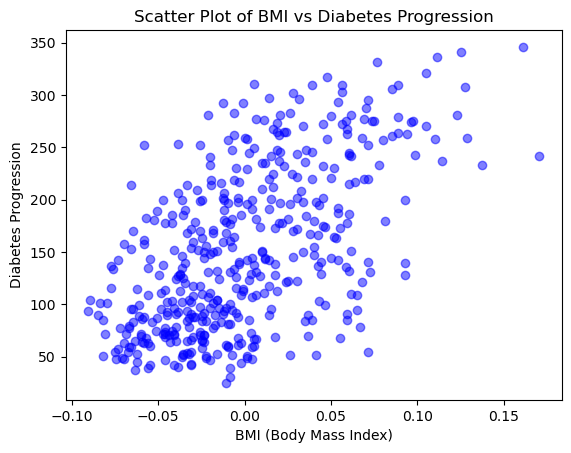

In [25]:
# Scatter plot to visualize the relationship
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Diabetes Progression")
plt.title("Scatter Plot of BMI vs Diabetes Progression")
plt.show()

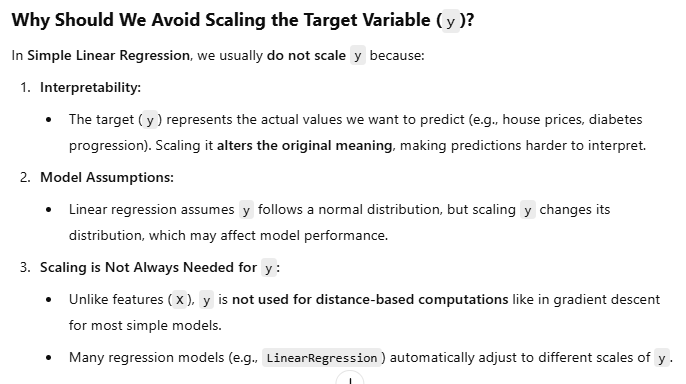

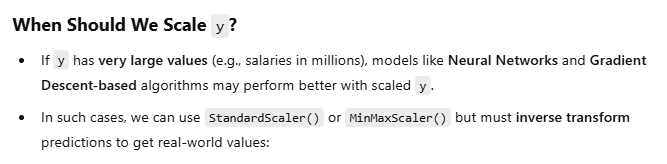

# Step 6: Train the Simple Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
slr = LinearRegression().fit(X_train_scaled,y_train.values.reshape(-1,1))

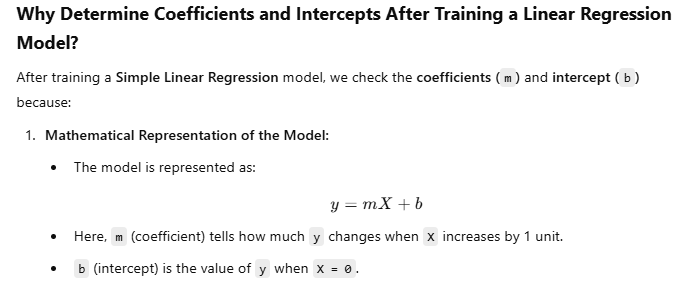

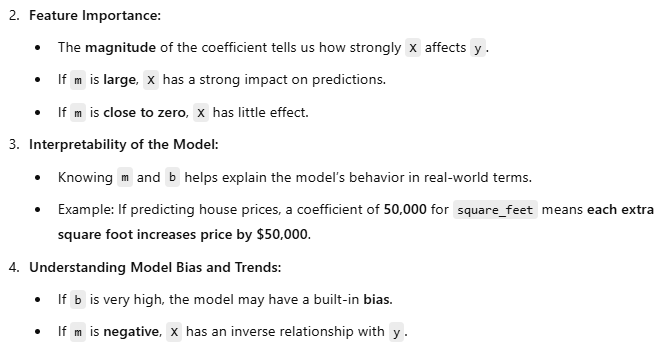

In [33]:
print("Coefficient (m):", slr.coef_)   # Slope of the line
print("Intercept (b):", slr.intercept_)  # Where the line crosses y-axis


Coefficient (m): [[46.25927512]]
Intercept (b): [151.98310811]


# Step 7: Make Predictions
-  Make prdiction on X_train name it as y_train_pred
-  Make predictions on X_test name it as y_test_pred

#### 1) Make Predictions on X_train and name it as y_train_pred

In [36]:
y_pred_train = slr.predict(X_train_scaled)


In [37]:
print(y_pred_train.ndim)
print(type(y_pred_train))

2
<class 'numpy.ndarray'>


In [38]:
import pandas as pd

# Convert y_train (Series) and y_pred_train (NumPy array) to 1D
y_pred_train = y_pred_train.flatten()  # If it's a 2D NumPy array
y_train = y_train.values.flatten()  # Convert Series to NumPy array, then flatten

# Create DataFrame
train_error_df = pd.DataFrame({
    "Y_pred": y_pred_train,
    "Y_train": y_train
})

# Print DataFrame
train_error_df.head()


,Y_pred,Y_train
0,120.107760,154.0
1,202.945406,192.0
2,145.273627,116.0
3,141.079316,81.0
4,174.633805,122.0


In [39]:
error_ytain = y_pred_train - y_train

In [40]:
train_error_df["Train_Pred_error"] = error_ytain

In [41]:
train_error_df.head(5)

,Y_pred,Y_train,Train_Pred_error
0,120.107760,154.0,-33.892240
1,202.945406,192.0,10.945406
2,145.273627,116.0,29.273627
3,141.079316,81.0,60.079316
4,174.633805,122.0,52.633805


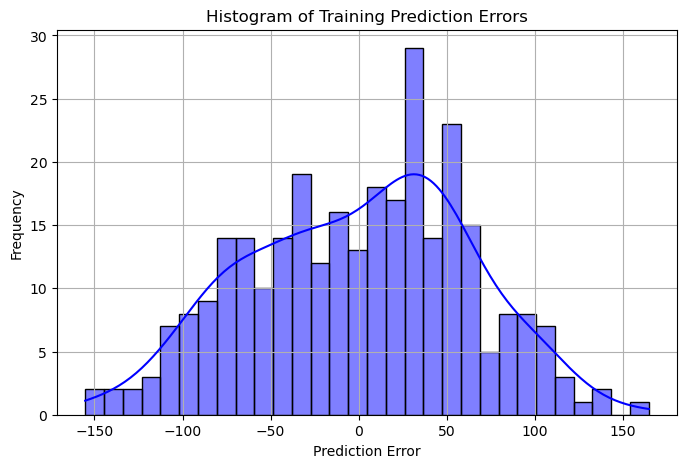

In [42]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(train_error_df["Train_Pred_error"], bins=30, kde=True, color="blue")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Training Prediction Errors")
plt.grid(True)
plt.show()

In [43]:
# Compute mean and standard deviation
mean_error = np.mean(train_error_df["Train_Pred_error"])
std_error = np.std(train_error_df["Train_Pred_error"], ddof=1)  # ddof=1 for sample std deviation

# Print results
print(f"Mean of Training Prediction Error: {mean_error:.4f}")
print(f"Standard Deviation of Training Prediction Error: {std_error:.4f}")

Mean of Training Prediction Error: -0.0000
Standard Deviation of Training Prediction Error: 62.3632


In [44]:
mean_error = train_error_df["Train_Pred_error"].mean()
median_error = train_error_df["Train_Pred_error"].median()
mode_error = train_error_df["Train_Pred_error"].mode()[0]  # Mode can have multiple values; take the first one.

print(f"Mean: {mean_error:.4f}")
print(f"Median: {median_error:.4f}")
print(f"Mode: {mode_error:.4f}")


Mean: -0.0000
Median: 6.7334
Mode: 30.7878


#### 2) Make Predictions on X_train and name it as y_test_pred

In [81]:
y_test_pred = slr.predict(X_test_scaled)


In [83]:
print(y_test_pred.ndim)
print(type(y_test_pred))

2
<class 'numpy.ndarray'>


In [85]:
import pandas as pd

# Convert y_train (Series) and y_pred_train (NumPy array) to 1D
y_test_pred = y_test_pred.flatten()  # If it's a 2D NumPy array
y_test = y_test.values.flatten()  # Convert Series to NumPy array, then flatten

# Create DataFrame
test_error_df = pd.DataFrame({
    "Y_pred": y_test_pred,
    "Y_test": y_test
})

# Print DataFrame
test_error_df.head()


,Y_pred,Y_test
0,144.225049,219.0
1,186.168161,70.0
2,146.322205,202.0
3,200.848250,230.0
4,130.593538,111.0


In [87]:
error_ytest = y_test_pred - y_test

In [89]:
test_error_df["Test_Pred_error"] = error_ytest

In [91]:
train_error_df.head(5)

,Y_pred,Y_train,Train_Pred_error
0,120.107760,154.0,-33.892240
1,202.945406,192.0,10.945406
2,145.273627,116.0,29.273627
3,141.079316,81.0,60.079316
4,174.633805,122.0,52.633805


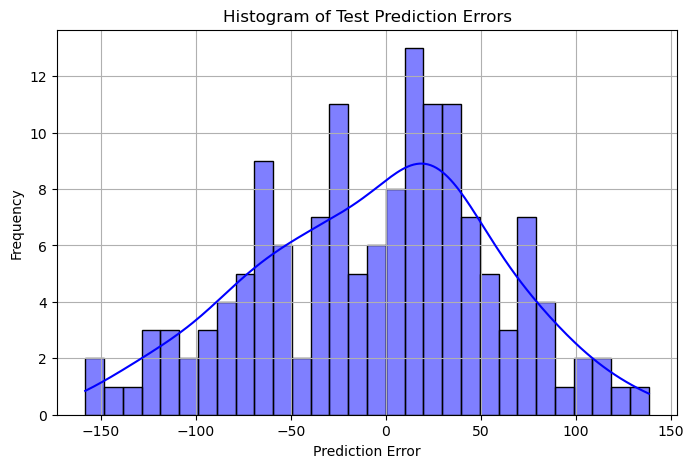

In [99]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(test_error_df["Test_Pred_error"], bins=30, kde=True, color="blue")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Test Prediction Errors")
plt.grid(True)
plt.show()

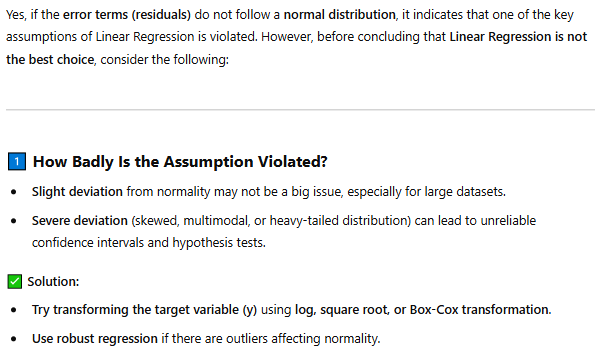

In [97]:
import numpy as np

# Calculate mean, median, and mode
mean_test_error = test_error_df["Test_Pred_error"].mean()
median_test_error = test_error_df["Test_Pred_error"].median()
mode_test_error = test_error_df["Test_Pred_error"].mode()[0]  # Mode may return multiple values; take the first one
std_dev_test_error = test_error_df["Test_Pred_error"].std()
# Print values
print(f"Mean of Test Prediction Error: {mean_test_error:.4f}")
print(f"Median of Test Prediction Error: {median_test_error:.4f}")
print(f"Mode of Test Prediction Error: {mode_test_error:.4f}")
print(f"Standard Deviation of Test Prediction Error: {std_dev_test_error:.4f}")


Mean of Test Prediction Error: -5.6637
Median of Test Prediction Error: 2.2677
Mode of Test Prediction Error: -158.1067
Standard Deviation of Test Prediction Error: 62.6809


# Assumptions of Linear Regression
Linear regression relies on several key assumptions to ensure that the model provides reliable predictions. Let's break down the three assumptions you mentioned in detail:



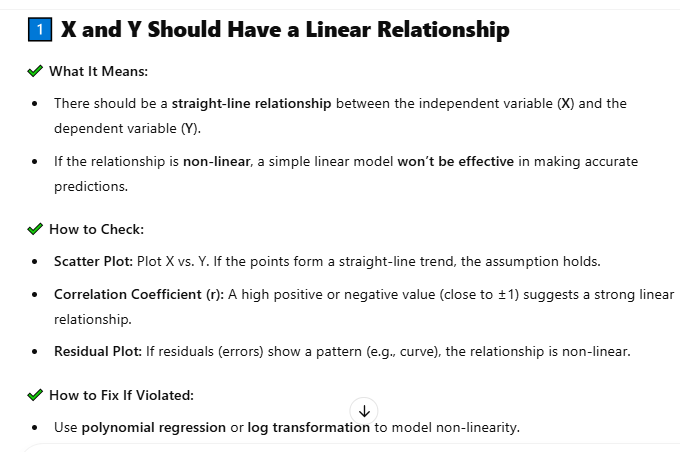

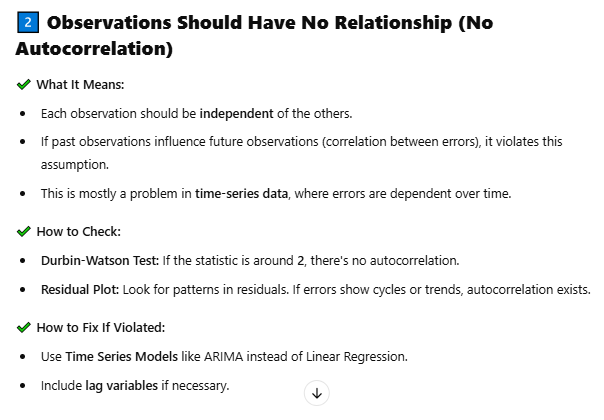

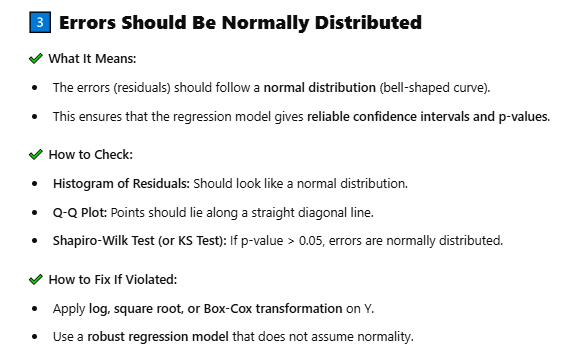

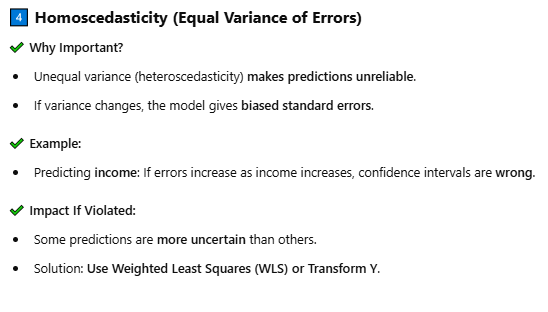

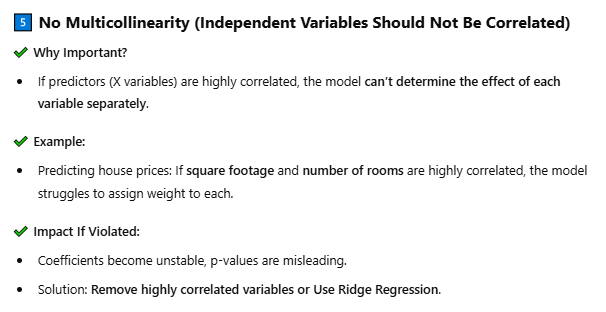

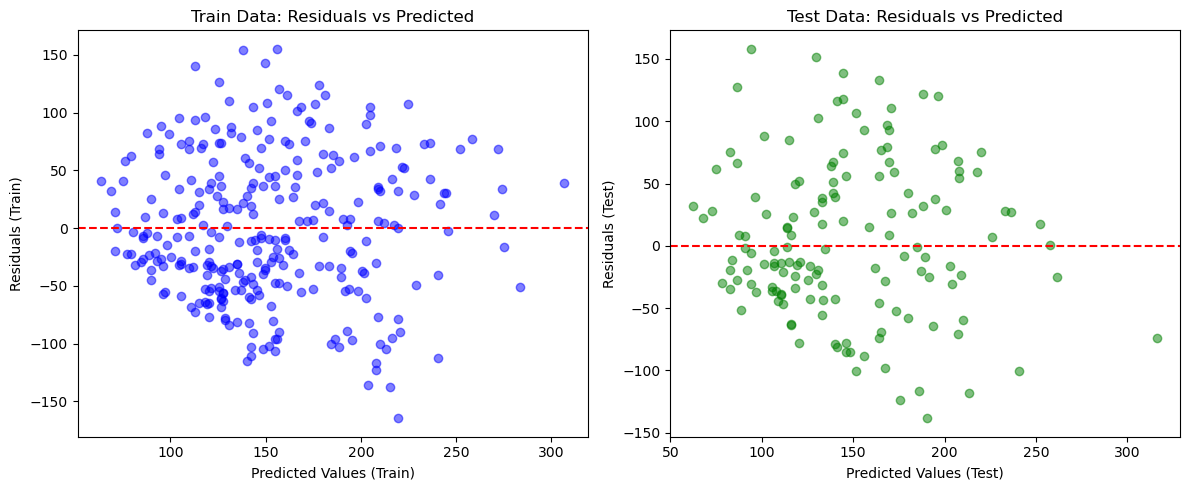

In [109]:
# Calculate residuals (errors)
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_test_pred

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train Residual Plot
axes[0].scatter(y_pred_train, train_residuals, color="blue", alpha=0.5)
axes[0].axhline(y=0, color="red", linestyle="dashed")
axes[0].set_xlabel("Predicted Values (Train)")
axes[0].set_ylabel("Residuals (Train)")
axes[0].set_title("Train Data: Residuals vs Predicted")

# Test Residual Plot
axes[1].scatter(y_test_pred, test_residuals, color="green", alpha=0.5)
axes[1].axhline(y=0, color="red", linestyle="dashed")
axes[1].set_xlabel("Predicted Values (Test)")
axes[1].set_ylabel("Residuals (Test)")
axes[1].set_title("Test Data: Residuals vs Predicted")

plt.tight_layout()
plt.show()

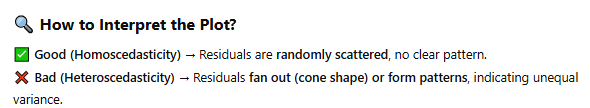

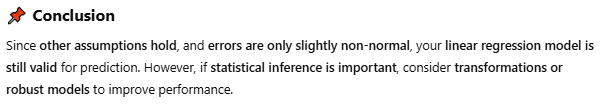

 # Checck if the model is Generalised or not

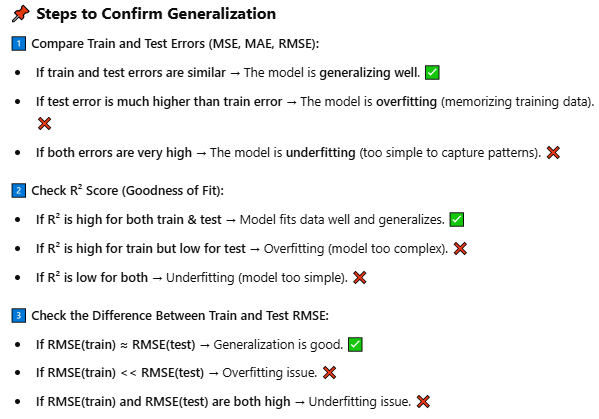

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [123]:
# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for test data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [125]:
# Print the results
print("Train Data Metrics:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTest Data Metrics:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")


Train Data Metrics:
MSE: 3876.0285
MAE: 51.8693
RMSE: 62.2578
R² Score: 0.3557

Test Data Metrics:
MSE: 3934.0673
MAE: 50.9684
RMSE: 62.7221
R² Score: 0.3164
